In [1]:
import sys
sys.path.append("..")

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
from environment.qlearning.exploration_env import ExplorationEnv
from utils.reader import get_yaml_path, read_file
from utils.reproducibility import set_global_seed

In [4]:
from agent.qagent import QAgent
from training.general_qlearning import QLearning

In [5]:
import pygame
import numpy as np

In [6]:
server_address = "localhost:50051"
client_name = "RLClient"
env = ExplorationEnv(server_address, client_name)
env.connect_to_client()

2025-11-03 21:29:05,275 — INFO — ✓ Connected to localhost:50051



In [7]:
config_path = get_yaml_path("resources", "configurations", "exploration.yml")
config = read_file(config_path)
print(config)

simulation:
    seed: 42
    duration: 1000000
environment:
    width: 5
    height: 5
    entities:
        - agent:
            id: 00000000-0000-0000-0000-000000000001
            radius: 0.25
            withProximitySensors: true
            withLightSensors: true
            position: [1.0, 1.0]
            orientation: 0.0
            speed: 1.0
            reward: Exploration
            termination: CoverageTermination
            truncation: CollisionDetection
#        - obstacle:
#            orientation: 0.0
#            position: [ 3.0, 2.0 ]
#            width: 1.0
#            id: 0749c579-c64b-43be-a225-c8a0745e4fee
#            height: 1.0


In [8]:
env.init(config)

2025-11-03 21:29:05,710 — INFO — ✓ Initialization successful


(True, '')

In [9]:
set_global_seed(seed=42, env=env, verbose=True)

2025-11-03 21:29:05,949 — INFO — [set_global_seed] Environment seed set.
2025-11-03 21:29:05,951 — INFO — [set_global_seed] All available seeds set to 42.


In [10]:
agent = QAgent(env)
agentId = "00000000-0000-0000-0000-000000000001"
agents = { agentId: agent }

In [11]:
episodes = 120 # 60
steps = 3000 # 3000

In [12]:
trainer = QLearning(env, agents, episode_count=episodes, max_steps_per_episode=steps)

In [13]:
rewards = trainer.train(render=False, record_history=True)

Training: 100%|██████████| 120/120 [06:40<00:00,  3.34s/ep]


In [14]:
print("Reward medio ultimi 50 episodi:", sum(rewards[agentId][-50:]) / 50)

Reward medio ultimi 50 episodi: 398.53


In [15]:
eval_results = trainer.evaluate(test_episode_count=1, max_steps_per_episode=2000,  render=True)
print("Average evaluation reward:", eval_results[agentId])

Evaluation: 100%|██████████| 1/1 [00:12<00:00, 12.09s/ep]

2025-11-03 21:35:59,909 — INFO — [00000000-0000-0000-0000-000000000001] Avg steps: 120.0 | Avg reward: -89.5
Average evaluation reward: {'total_reward': -89.5, 'avg_steps': 120.0, 'avg_total_reward': -89.5}


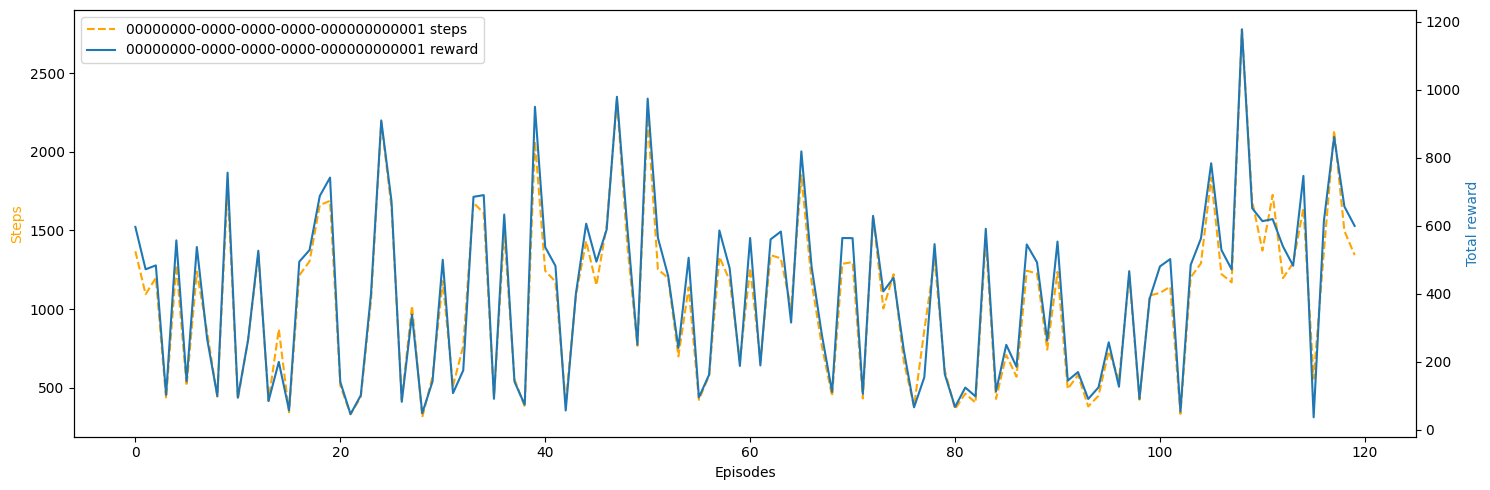

In [16]:
from utils.plotting import plot_learning_history

plot_learning_history(trainer.learning_history)